In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import date, datetime

from sklearn.metrics import confusion_matrix
from sklearn.metrics import normalized_mutual_info_score, mutual_info_score
from sklearn.feature_selection import mutual_info_regression

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline

from matplotlib import colors
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers


In [2]:
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
noun_sentence_df_final_joined_df_selected_columns_use_min = pd.\
    read_feather('noun_sentence_df_final_joined_df_selected_columns_use_min_all.fea')

In [4]:
noun_sentence_df_final_joined_df_selected_columns_use_min = noun_sentence_df_final_joined_df_selected_columns_use_min.dropna()

In [5]:
noun_sentence_df_final_joined_df_selected_columns_use_min.columns

Index(['level_0', 'listingid', 'index_x', 'AVM_Error_List_x',
       'Listing_Error_List_x', 'Transdate_x', 'Transprice_x', 'total_value_x',
       'cj_living_area_x', 'effective_year_built_x',
       ...
       'sentence_composition_0', 'sentence_composition_1',
       'sentence_composition_2', 'sentence_composition_3',
       'sentence_composition_4', 'sentence_composition_5',
       'sentence_composition_6', 'sentence_composition_7',
       'sentence_composition_8', 'transaction_year'],
      dtype='object', length=158)

In [6]:
predictor_columns = [  'AVM_Error_Indicators_4_y',
 'sentence_composition_0_x',
 'AVM_Error_Indicators_0',
 'Listing_Error_Indicators_1_x',
 'AVM_Error_Indicators_4',
 'AVM_Error_Indicators_scale_x',
 'AVM_Error_Indicators_11_x',
 'AVM_Error_Indicators_11_y',
 'sentence_composition_7_y',
 'AVM_Error_Indicators_0_y',
 'sentence_composition_7',
 'sentence_composition_7_x',
 'Listing_Error_Indicators_4_x',
 'AVM_Error_Indicators_4_x',
 'AVM_Error_Indicators_8_x',
 'AVM_Error_Indicators_10_y',
 'AVM_Error_Indicators_7_x',
 'AVM_Error_Indicators_10_x',
 'AVM_Error_Indicators_1_x',
 'cj_living_area_x',
 'AVM_Error_Indicators_0_x',
 'AVM_Error_Indicators_6_x',
 'AVM_Error_Indicators_5_x',
 'avmValue_x']

In [7]:
Predictors = noun_sentence_df_final_joined_df_selected_columns_use_min.loc[:,predictor_columns].to_numpy()

In [8]:
Predictors.shape

(400756, 24)

In [9]:
for i in range(Predictors.shape[1]):
    Predictors[:,i]=(Predictors[:,i]-np.mean(Predictors[:,i]))/np.std(Predictors[:,i])

In [10]:
predictand = noun_sentence_df_final_joined_df_selected_columns_use_min.avmerror.values

In [11]:
predictand.shape

(400756,)

In [12]:
train_samples = 200000  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    Predictors,
    predictand,
    shuffle=False,
    test_size=len(Predictors) - train_samples,
)

In [13]:
X_train.shape

(200000, 24)

In [14]:
from tensorflow.keras import datasets, layers, models

In [15]:
# Model definition

model_NN_Class = keras.Sequential()
model_NN_Class.add(keras.layers.Dense(15, activation='relu', input_dim=24))
model_NN_Class.add(keras.layers.BatchNormalization())
model_NN_Class.add(keras.layers.Dropout(0.1))
model_NN_Class.add(keras.layers.Dense(7, activation='relu'))
model_NN_Class.add(keras.layers.BatchNormalization())
model_NN_Class.add(keras.layers.Dense(1, activation='linear', use_bias =True))

In [54]:
X_train.shape[1]

24

In [55]:
model = models.Sequential()

# design network

model.add(keras.layers.LSTM(50, input_shape=(1,X_train.shape[1])))
model.add(keras.layers.Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
model.summary()

Epoch 1/50


ValueError: in user code:

    /home/cdsw/.local/lib/python3.6/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /home/cdsw/.local/lib/python3.6/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/cdsw/.local/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/cdsw/.local/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/cdsw/.local/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/cdsw/.local/lib/python3.6/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /home/cdsw/.local/lib/python3.6/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /home/cdsw/.local/lib/python3.6/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/cdsw/.local/lib/python3.6/site-packages/keras/engine/input_spec.py:218 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential_18 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 24)


In [20]:
model_NN_Class.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                375       
_________________________________________________________________
batch_normalization (BatchNo (None, 15)                60        
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 112       
_________________________________________________________________
batch_normalization_1 (Batch (None, 7)                 28        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 583
Trainable params: 539
Non-trainable params: 44
_________________________________________________________

In [36]:
optimizer = keras.optimizers.Adam(learning_rate=0.005)
#, decay=5e-4
model_NN_Class.compile(loss='mean_absolute_error', optimizer=optimizer)

In [42]:
optimizer = keras.optimizers.Adam(learning_rate=0.005)
#, decay=5e-4
model.compile(loss='mean_absolute_error', optimizer=optimizer)

In [43]:
fit_history = model.fit(X_train, y_train, epochs=50, batch_size= 1000,validation_data=(X_train_2, y_test))

Epoch 1/50


ValueError: in user code:

    /home/cdsw/.local/lib/python3.6/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /home/cdsw/.local/lib/python3.6/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/cdsw/.local/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/cdsw/.local/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/cdsw/.local/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/cdsw/.local/lib/python3.6/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /home/cdsw/.local/lib/python3.6/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /home/cdsw/.local/lib/python3.6/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/cdsw/.local/lib/python3.6/site-packages/keras/engine/input_spec.py:234 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential_11 is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: (1000, 24)


In [37]:
fit_history = model_NN_Class.fit(X_train, y_train, epochs=50, batch_size= 1000,validation_data=(X_test, y_test))

Epoch 1/50
200/200 [==============================] - 2s 7ms/step - loss: 0.2618 - val_loss: 0.1169
Epoch 2/50
200/200 [==============================] - 1s 7ms/step - loss: 0.1206 - val_loss: 0.1115
Epoch 3/50
200/200 [==============================] - 1s 7ms/step - loss: 0.1190 - val_loss: 0.1119
Epoch 4/50
200/200 [==============================] - 1s 7ms/step - loss: 0.1182 - val_loss: 0.1102
Epoch 5/50
200/200 [==============================] - 1s 7ms/step - loss: 0.1172 - val_loss: 0.1087
Epoch 6/50
200/200 [==============================] - 1s 7ms/step - loss: 0.1163 - val_loss: 0.1111
Epoch 7/50
200/200 [==============================] - 1s 7ms/step - loss: 0.1158 - val_loss: 0.1088
Epoch 8/50
200/200 [==============================] - 1s 7ms/step - loss: 0.1154 - val_loss: 0.1089
Epoch 9/50
200/200 [==============================] - 1s 7ms/step - loss: 0.1151 - val_loss: 0.1091
Epoch 10/50
200/200 [==============================] - 1s 7ms/step - loss: 0.1148 - val_loss: 0.1072

In [17]:
predictions_test = model_NN_Class.predict(X_test)
predictions_train = model_NN_Class.predict(X_train)

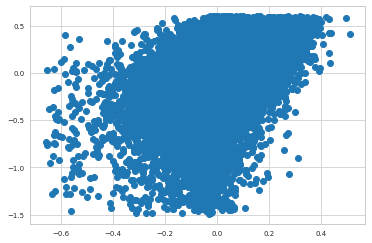

In [18]:
plt.plot(predictions_train,y_train,'o')

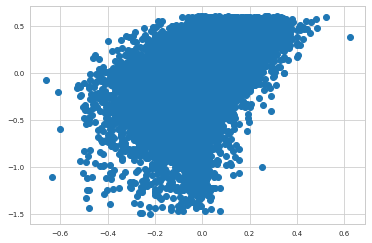

In [19]:
plt.plot(predictions_test,y_test,'o')

In [24]:
predictions_test[:,0].shape

(200756,)

In [25]:
 noun_sentence_df_final_joined_df_selected_columns_use_min['avmValue_x'].values[train_samples:]/(1-predictions_test[:,0])

array([184148.56374148, 506851.79619252, 549442.02284897, ...,
       345876.68838595, 113406.00430779, 562765.6367034 ])

In [26]:
predictions_test_value = noun_sentence_df_final_joined_df_selected_columns_use_min['avmValue_x'].values[train_samples:]/(1-predictions_test[:,0])
predictions_train_value = noun_sentence_df_final_joined_df_selected_columns_use_min['avmValue_x'].values[:train_samples]/(1-predictions_train[:,0])
#predictions_train_value = df['avmValue'].values/(1-Predictors)

In [27]:
print(np.mean(np.abs(noun_sentence_df_final_joined_df_selected_columns_use_min['Transprice_x'].values[:train_samples]-predictions_train_value)/\
              (noun_sentence_df_final_joined_df_selected_columns_use_min['Transprice_x'].values[:train_samples])))
print(np.mean(np.abs(noun_sentence_df_final_joined_df_selected_columns_use_min['Transprice_x'].values[:train_samples]- noun_sentence_df_final_joined_df_selected_columns_use_min['avmValue_x'].values[:train_samples])/\
              (noun_sentence_df_final_joined_df_selected_columns_use_min['Transprice_x'].values[:train_samples])))


0.11387066205642107
0.12211574741864119


In [28]:
print(np.mean(np.abs(noun_sentence_df_final_joined_df_selected_columns_use_min['Transprice_x'].values[train_samples:]-predictions_test_value)/\
              (noun_sentence_df_final_joined_df_selected_columns_use_min['Transprice_x'].values[train_samples:])))
print(np.mean(np.abs(noun_sentence_df_final_joined_df_selected_columns_use_min['Transprice_x'].values[train_samples:]- noun_sentence_df_final_joined_df_selected_columns_use_min['avmValue_x'].values[train_samples:])/\
              (noun_sentence_df_final_joined_df_selected_columns_use_min['Transprice_x'].values[train_samples:])))

0.10794183042605764
0.11670730944205586


In [34]:

filename = 'RF_newmodel_01_3mins.h5'
model_NN_Class.save(filename)